Theoretical Questions

Q1 What is unsupervised learning in the context of machine learning

Unsupervised learning is a type of machine learning where the model is given data without labeled responses. The algorithm tries to identify patterns, structures, or groupings in the data. Clustering and dimensionality reduction are common tasks in unsupervised learning.

Q2 How does K-Means clustering algorithm work

K-Means partitions data into K clusters by:

Randomly initializing K centroids.

Assigning each data point to the nearest centroid.

Updating centroids as the mean of all points assigned to each cluster.

Repeating steps 2 and 3 until convergence (when cluster assignments no longer change).

Q3 Explain the concept of a dendrogram in hierarchical clustering

A dendrogram is a tree-like diagram that shows the arrangement of clusters formed by hierarchical clustering. It illustrates how clusters are merged or split at various levels of similarity (or distance), helping to decide the number of clusters.

Q4 What is the main difference between K-Means and Hierarchical Clustering

K-Means requires specifying the number of clusters in advance and is efficient for large datasets.

Hierarchical Clustering does not require the number of clusters upfront and creates a tree of clusters (dendrogram), but it’s less scalable

Q5 What are the advantages of DBSCAN over K-Means

DBSCAN does not require specifying the number of clusters.

Can find clusters of arbitrary shape.

Automatically detects noise/outliers.

Works better with clusters of varying densities and sizes.

Q6 When would you use Silhouette Score in clustering

Silhouette Score measures how similar a data point is to its own cluster vs. other clusters. It helps in:

Evaluating clustering quality.

Choosing the optimal number of clusters.

Values range from -1 (poor) to +1 (well-clustered).

Q7 What are the limitations of Hierarchical Clustering

Computationally expensive for large datasets.

Once a merge/split is done, it cannot be undone.

Sensitive to noise and outliers.

Less scalable than K-Means or DBSCAN.

Q8 Why is feature scaling important in clustering algorithms like K-Means

K-Means uses Euclidean distance, which is sensitive to the scale of features. Feature scaling (e.g., standardization) ensures that each feature contributes equally to the distance calculation and clustering process.

Q9 How does DBSCAN identify noise points

Points not belonging to any dense region (i.e., not a core point and not within ε-distance of a core point) are labeled as noise or outliers

Q10 Define inertia in the context of K-Means

Inertia is the sum of squared distances between data points and their assigned cluster centroids. It measures how internally coherent clusters are. Lower inertia implies tighter clusters.

Q11 What is the elbow method in K-Means clustering

The elbow method involves plotting the inertia against the number of clusters. The "elbow point" on the curve indicates the optimal number of clusters, where adding more clusters doesn't significantly reduce inertia.

Q12 Describe the concept of "density" in DBSCAN

In DBSCAN, density refers to the number of points within a given radius (ε) around a point. A region is considered dense if it has at least min_samples within ε-distance.

Q13 Can hierarchical clustering be used on categorical data

Yes, but it requires using appropriate distance metrics (e.g., Hamming distance) and sometimes data transformation (e.g., one-hot encoding). Standard Euclidean-based methods do not work well directly on categorical data.

Q14 What does a negative Silhouette Score indicate

A negative Silhouette Score means a point is closer to a different cluster than the one it was assigned to, indicating poor clustering or misclassification.

Q15 Explain the term "linkage criteria" in hierarchical clustering

Linkage criteria determine how distances between clusters are calculated when merging them:

Single linkage: minimum distance between two points.

Complete linkage: maximum distance between two points.

Average linkage: average distance between all points.

Ward’s method: minimizes variance within clusters.

Q16 Why might K-Means clustering perform poorly on data with varying cluster sizes or densities

K-Means assumes equal-sized, spherical clusters. It can perform poorly when clusters have:

Different sizes or densities.

Non-spherical shapes.

Presence of noise or outliers.

Q17 What are the core parameters in DBSCAN, and how do they influence clustering

ε (epsilon): the maximum distance between two points to be considered neighbors.

min_samples: the minimum number of points required to form a dense region. Larger ε or lower

min_samples makes DBSCAN form larger clusters; smaller ε finds tighter clusters.

Q18 How does K-Means++ improve upon standard K-Means initialization

K-Means++ improves initialization by:

Spreading out the initial centroids.

Reducing the chances of poor convergence.

Leading to better clustering performance and faster convergence.

Q19 What is agglomerative clustering

Agglomerative clustering is a bottom-up hierarchical approach:

Starts with each point as its own cluster.

Merges the closest pair of clusters step-by-step until all points belong to one cluster or desired number of clusters is reached.

Q20 What makes Silhouette Score a better metric than just inertia for model evaluation

Inertia only considers how compact the clusters are (within-cluster distance).

Silhouette Score considers both cohesion (within cluster) and separation (between clusters), giving a more complete view of clustering quality.

Practical Questions
Q21 Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

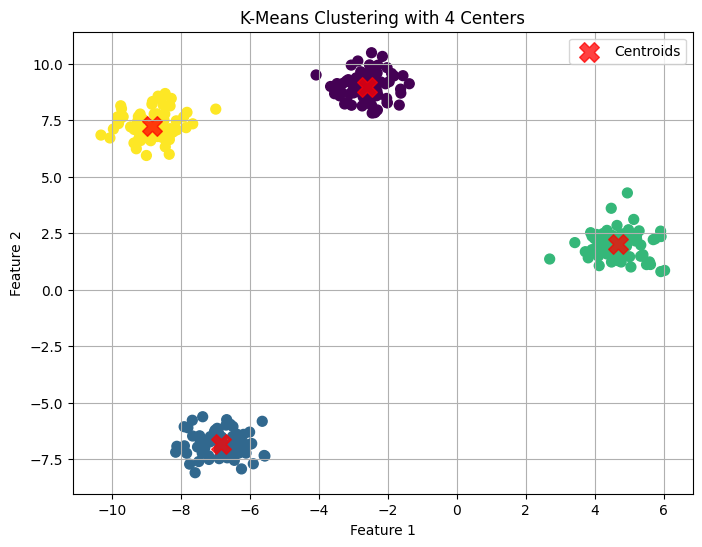

In [1]:
# Set OMP_NUM_THREADS to prevent warning and potential memory leak on Windows
import os
os.environ["OMP_NUM_THREADS"] = "2"  # Set before importing sklearn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Q22 Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

First 10 predicted cluster labels:
[1 1 1 1 1 1 1 1 1 1]


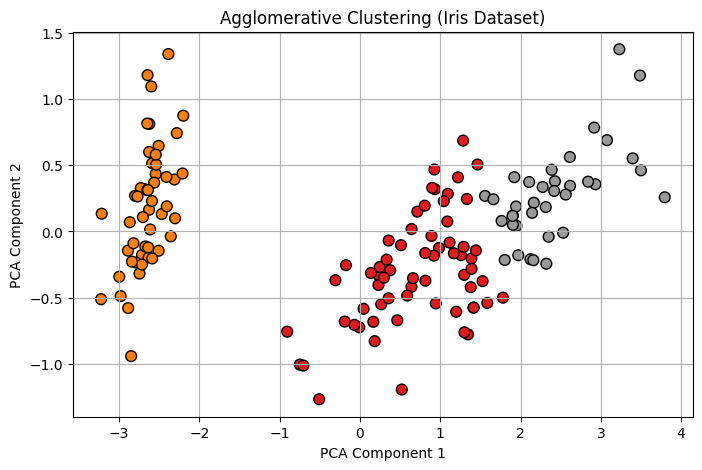

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Apply Agglomerative Clustering with 3 clusters
agglo = AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(X)

# Display the first 10 predicted labels
print("First 10 predicted cluster labels:")
print(labels[:10])

# Bonus: Visualize clusters using PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=60, edgecolor='k')
plt.title("Agglomerative Clustering (Iris Dataset)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

Q23 Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

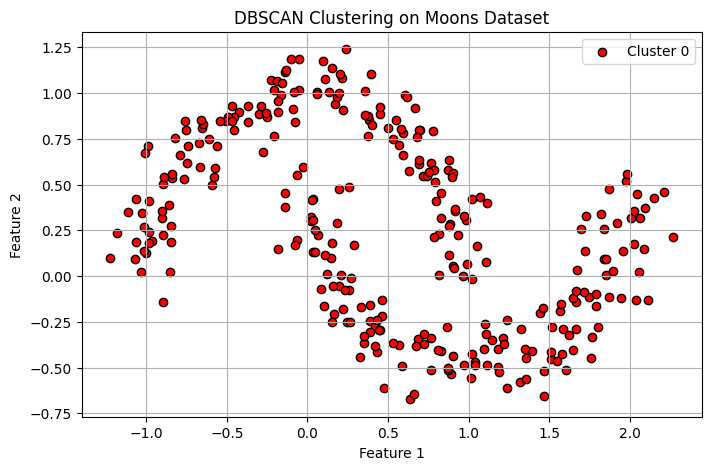

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic two-moon data
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify core, border, and noise points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Plotting
plt.figure(figsize=(8, 5))
unique_labels = set(labels)
colors = ['red', 'blue', 'green', 'purple', 'orange']

for label in unique_labels:
    if label == -1:
        # Outliers
        color = 'black'
        marker = 'x'
        label_name = 'Outliers'
    else:
        color = colors[label % len(colors)]
        marker = 'o'
        label_name = f'Cluster {label}'

    class_member_mask = (labels == label)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=color, marker=marker, edgecolor='k', label=label_name)

plt.title("DBSCAN Clustering on Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

Q24 Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # Fix for MKL memory leak warning on Windows

import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from collections import Counter

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get predicted cluster labels
labels = kmeans.labels_

# Print the size of each cluster
cluster_sizes = Counter(labels)
print("Cluster Sizes:")
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} samples")

Cluster Sizes:
Cluster 2: 62 samples
Cluster 0: 65 samples
Cluster 1: 51 samples



Q25 Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

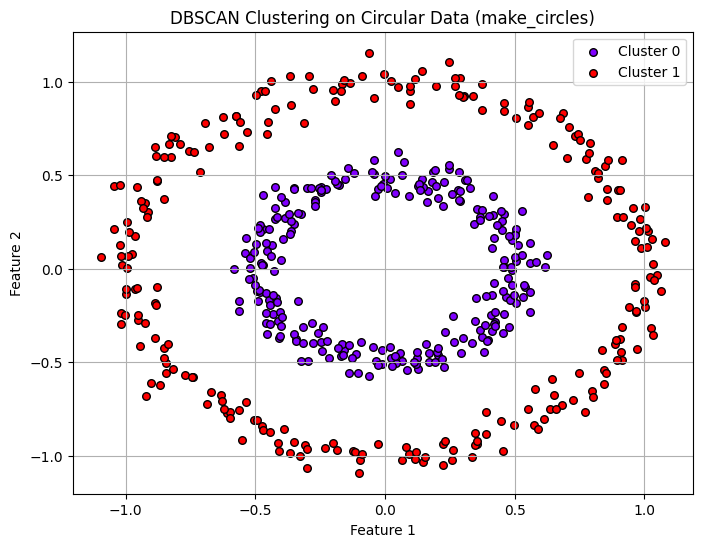

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Generate synthetic circular data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Noise points
        color = 'black'
        label_name = 'Noise'
    else:
        color = plt.cm.rainbow(label / max(unique_labels))
        label_name = f'Cluster {label}'

    plt.scatter(
        X[labels == label, 0],
        X[labels == label, 1],
        label=label_name,
        s=30,
        color=color,  # FIXED: Use `color=` instead of `c=`
        edgecolor='k'
    )

plt.title('DBSCAN Clustering on Circular Data (make_circles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()



Q26 Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  # Avoid MKL warning on Windows

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# Apply MinMaxScaler to scale the data between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Output the cluster centroids
centroids = kmeans.cluster_centers_

# Display centroids with feature names
centroid_df = pd.DataFrame(centroids, columns=feature_names)
print("Cluster Centroids:")
print(centroid_df)

Cluster Centroids:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal dimension  
0   

Q27 Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

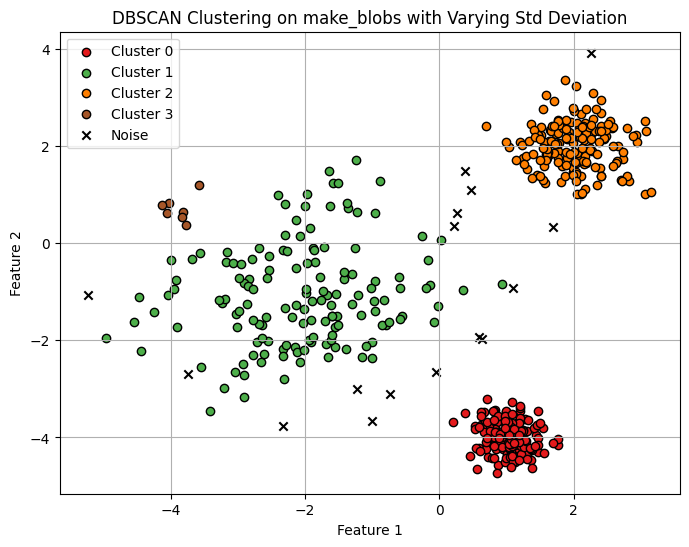

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Generate synthetic data with varying cluster std deviations
X, y = make_blobs(n_samples=500,
                  centers=[[2, 2], [-2, -1], [1, -4]],
                  cluster_std=[0.5, 1.2, 0.3],
                  random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Plotting the clusters and noise
plt.figure(figsize=(8, 6))

unique_labels = set(labels)
colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points (label = -1)
        color = 'k'
        marker = 'x'
        label_text = 'Noise'
    else:
        marker = 'o'
        label_text = f'Cluster {label}'

    plt.scatter(X[labels == label, 0],
                X[labels == label, 1],
                c=[color],
                marker=marker,
                label=label_text,
                edgecolor='k')

plt.title("DBSCAN Clustering on make_blobs with Varying Std Deviation")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


Q28 Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

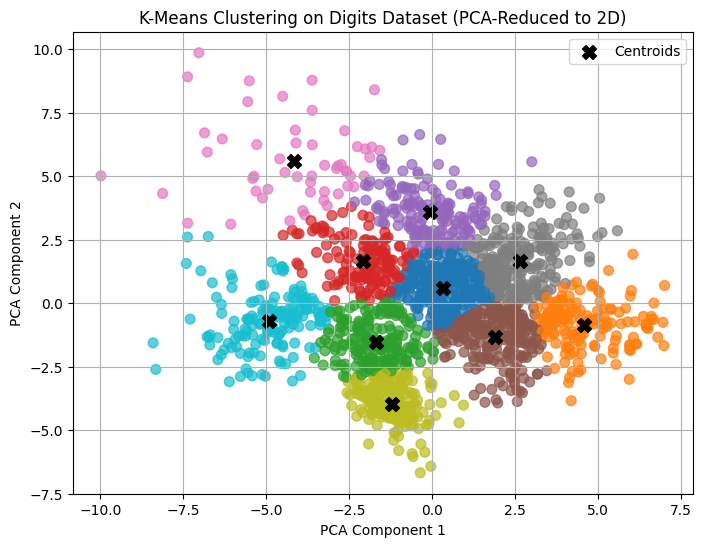

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # True labels (for reference, not used in KMeans)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', s=100, marker='X', label='Centroids')
plt.title("K-Means Clustering on Digits Dataset (PCA-Reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

Q29 Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

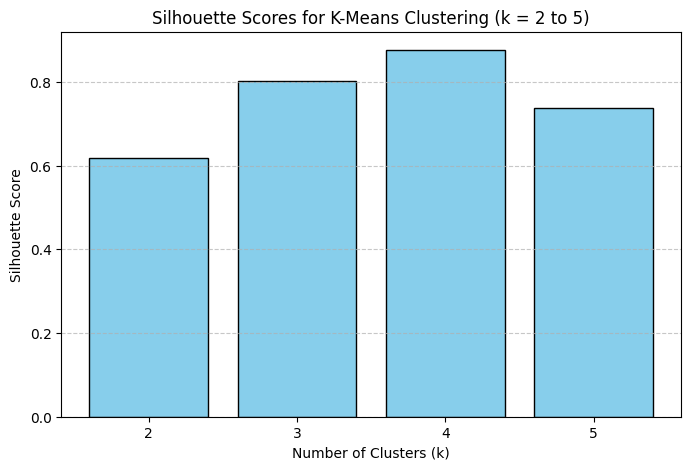

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Range of cluster numbers to evaluate
k_values = range(2, 6)
silhouette_scores = []

# Compute silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.bar(k_values, silhouette_scores, color='skyblue', edgecolor='black')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K-Means Clustering (k = 2 to 5)")
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q30 Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

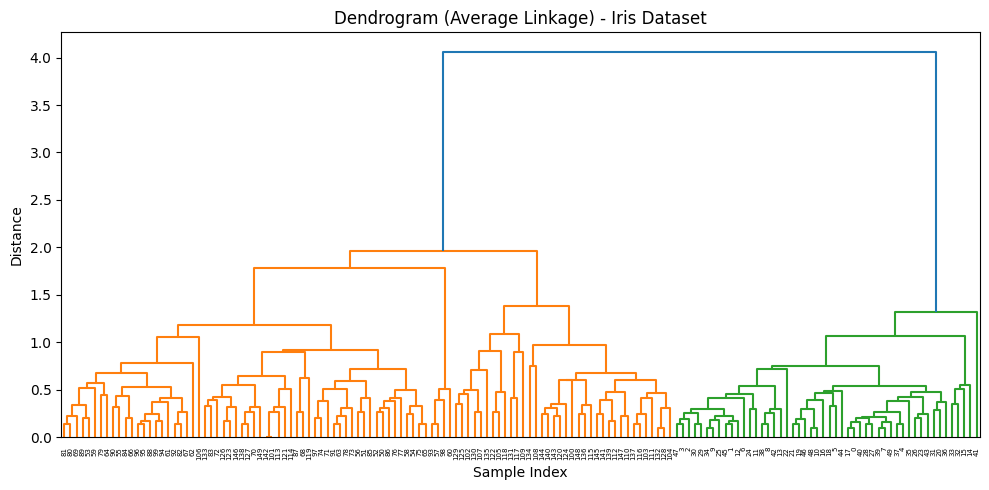

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Compute the linkage matrix using average linkage
linked = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Dendrogram (Average Linkage) - Iris Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Q31 Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

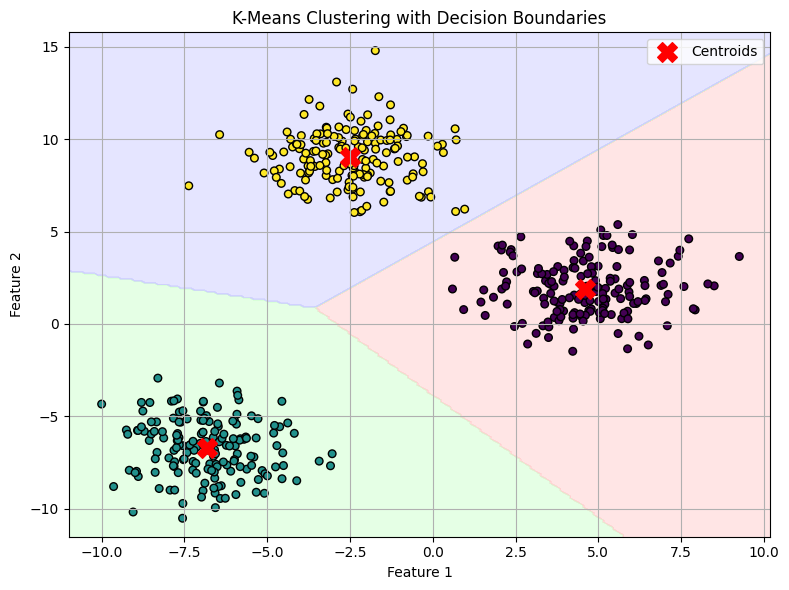

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Create meshgrid for decision boundaries
h = 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster labels for meshgrid points
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and clusters
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF']), alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering with Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Q32 Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

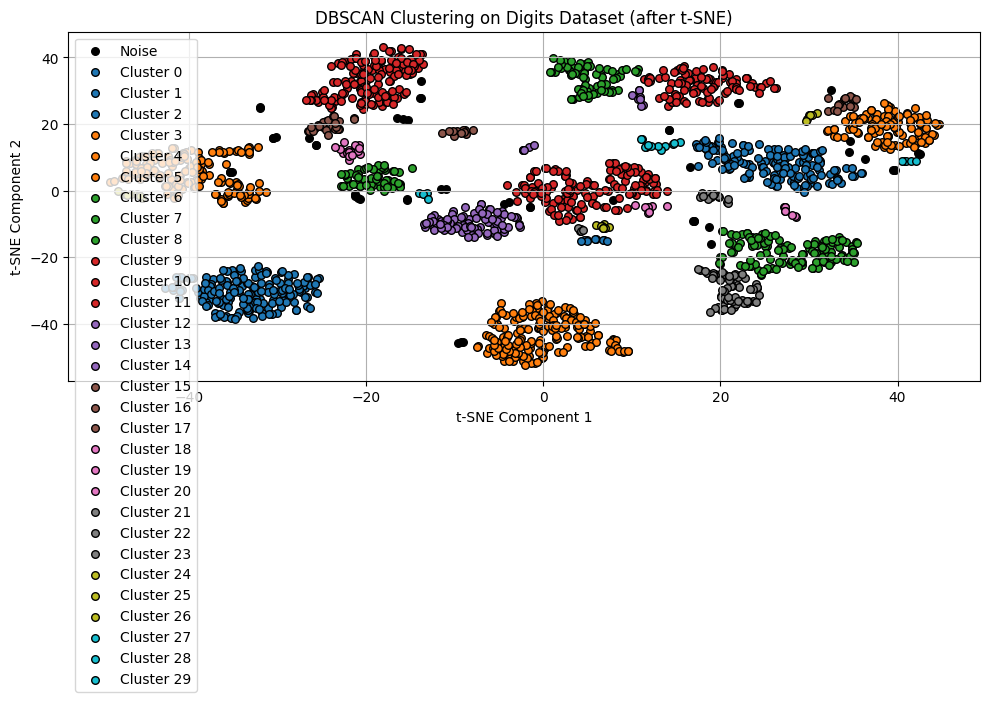

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Standardize the features (important for DBSCAN and t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Plot the DBSCAN clustering result
plt.figure(figsize=(10, 6))
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for label in unique_labels:
    mask = labels == label
    if label == -1:
        color = 'k'  # noise - black
        label_name = "Noise"
    else:
        color = colors(label)
        label_name = f"Cluster {label}"
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], s=30, c=[color], label=label_name, edgecolors='k')

plt.title("DBSCAN Clustering on Digits Dataset (after t-SNE)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Q33 Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

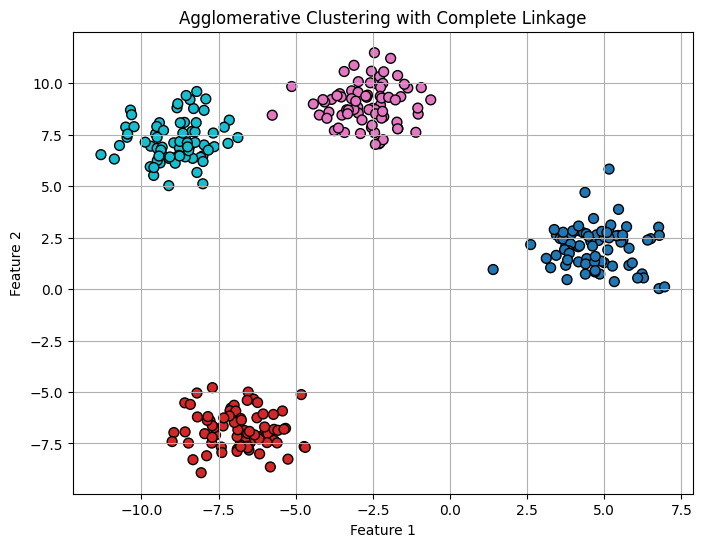

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg_cluster.fit_predict(X)

# Step 3: Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


Q34 Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

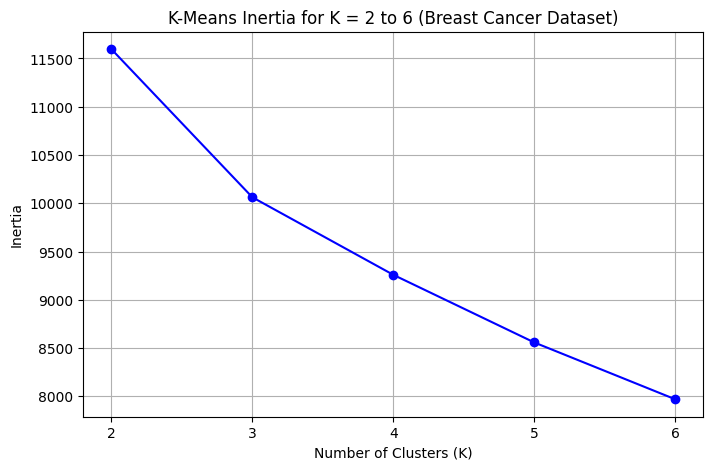

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans for K = 2 to 6 and store inertia
inertias = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Step 4: Plot the inertia values
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-', color='blue')
plt.title('K-Means Inertia for K = 2 to 6 (Breast Cancer Dataset)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_values)
plt.show()

Q35 Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

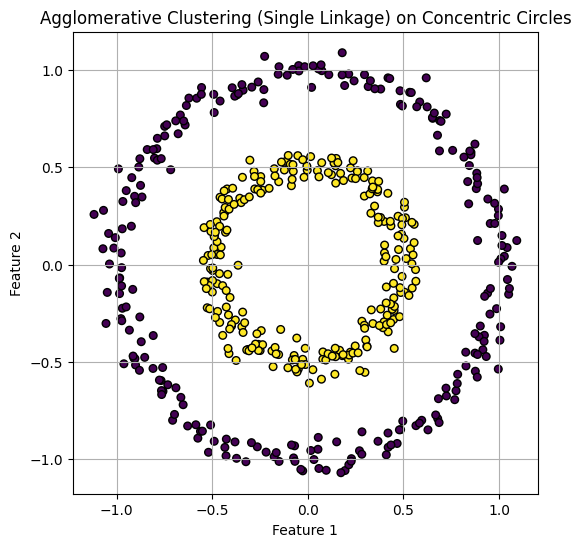

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic concentric circles
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=0)

# Step 2: Apply Agglomerative Clustering with single linkage
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_cluster.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, edgecolor='k')
plt.title('Agglomerative Clustering (Single Linkage) on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


Q36 Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [16]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count the number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters (excluding noise): 0
Number of noise points: 178


Q37 Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

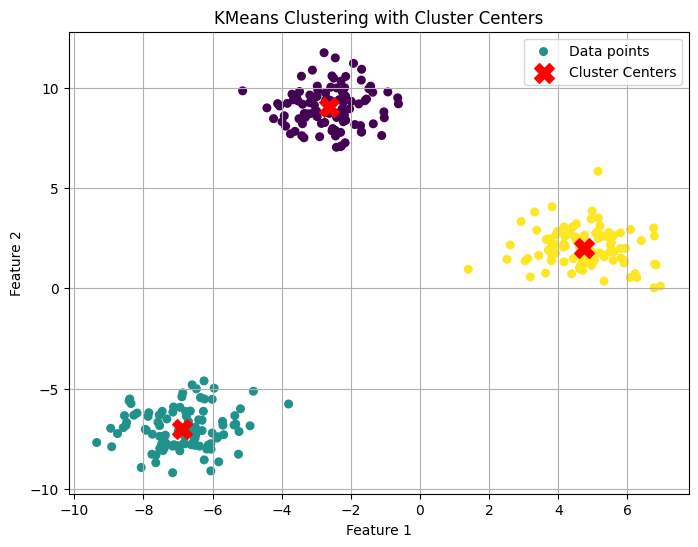

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 3 centers
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, label='Data points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


Q38 Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [18]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count the number of noise points (label == -1)
n_noise = np.sum(labels == -1)
print(f"Number of samples identified as noise: {n_noise}")

Number of samples identified as noise: 34



Q39 Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

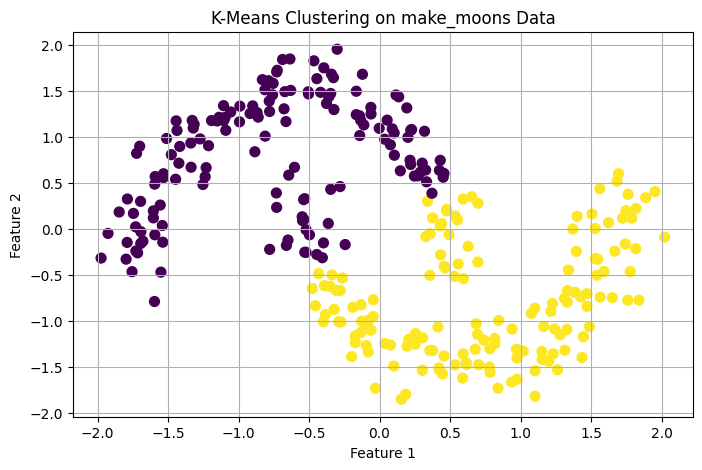

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate non-linearly separable data
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Visualize the result
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=50)
plt.title("K-Means Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

Q40 Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

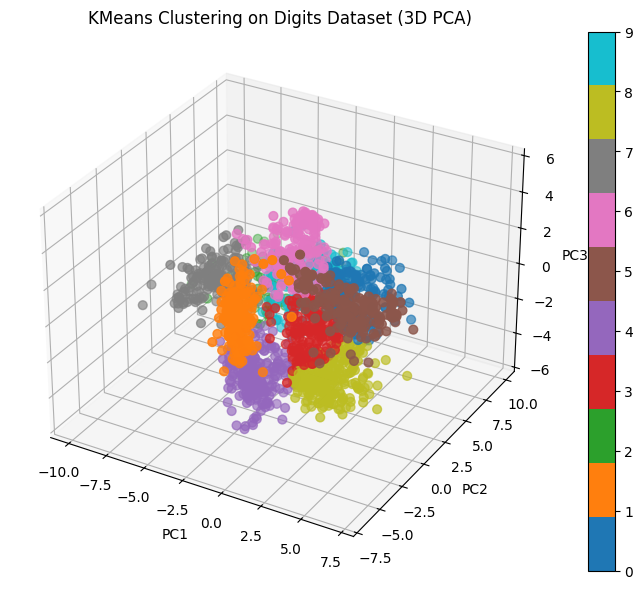

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 3 principal components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=40)

ax.set_title("KMeans Clustering on Digits Dataset (3D PCA)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(scatter)
plt.show()

Q41 Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

Silhouette Score for KMeans with 5 clusters: 0.799


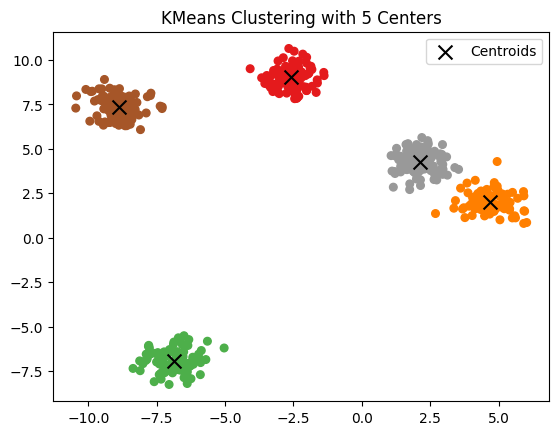

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data with 5 centers
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

# Calculate silhouette score
score = silhouette_score(X, labels)
print("Silhouette Score for KMeans with 5 clusters:", round(score, 3))

# Optional: Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='black', marker='x', label='Centroids', s=100)
plt.title("KMeans Clustering with 5 Centers")
plt.legend()
plt.show()

Q42 Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

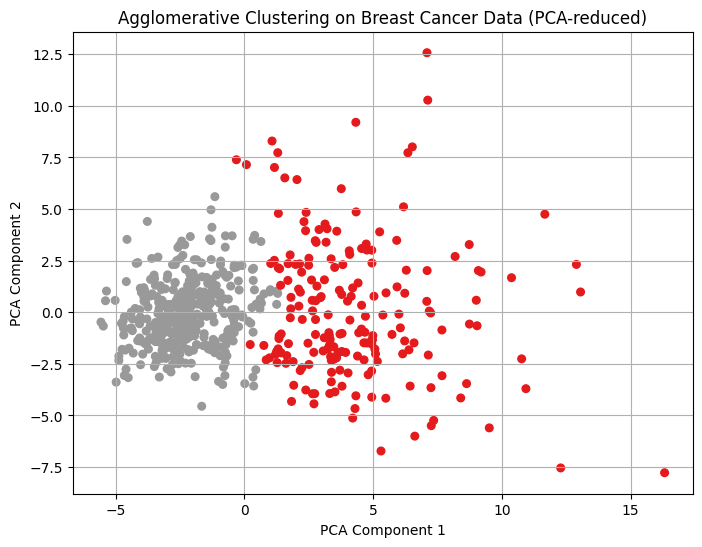

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(X_pca)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=30)
plt.title('Agglomerative Clustering on Breast Cancer Data (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


Q43 Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

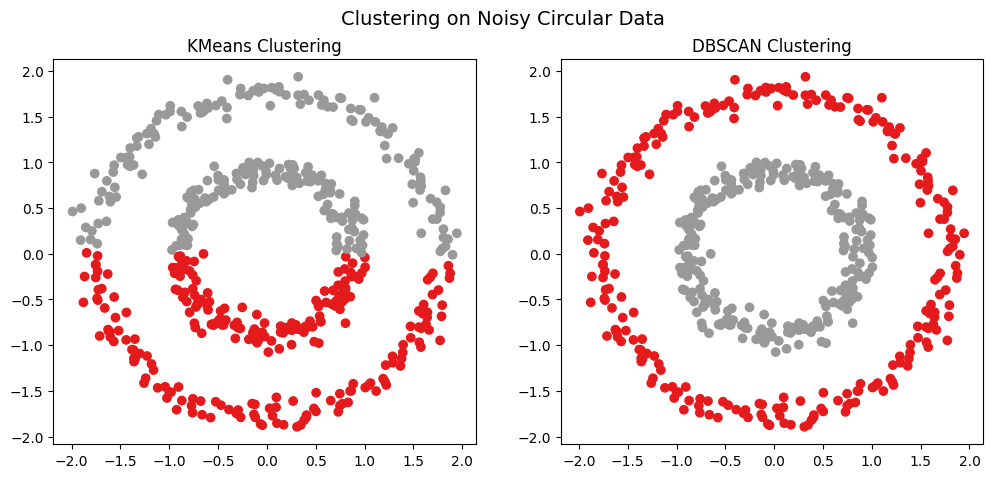

In [23]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# Generate noisy circular data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=0)

# Standardize the data (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Plotting the results side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KMeans plot
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='Set1')
axes[0].set_title("KMeans Clustering")

# DBSCAN plot
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='Set1')
axes[1].set_title("DBSCAN Clustering")

plt.suptitle("Clustering on Noisy Circular Data", fontsize=14)
plt.show()

Q44 Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

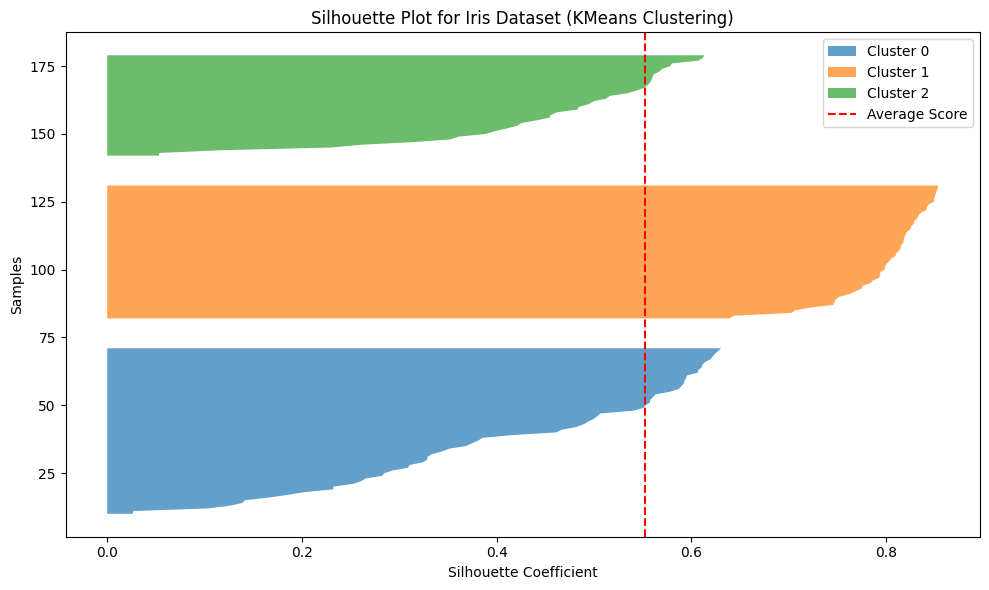

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
labels = kmeans.fit_predict(X)

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, labels)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(3):
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')

    y_lower = y_upper + 10  # space between clusters

# Add average silhouette score line
avg_score = silhouette_score(X, labels)
plt.axvline(x=avg_score, color="red", linestyle="--", label="Average Score")

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Samples")
plt.title("Silhouette Plot for Iris Dataset (KMeans Clustering)")
plt.legend()
plt.tight_layout()
plt.show()

Q45 Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

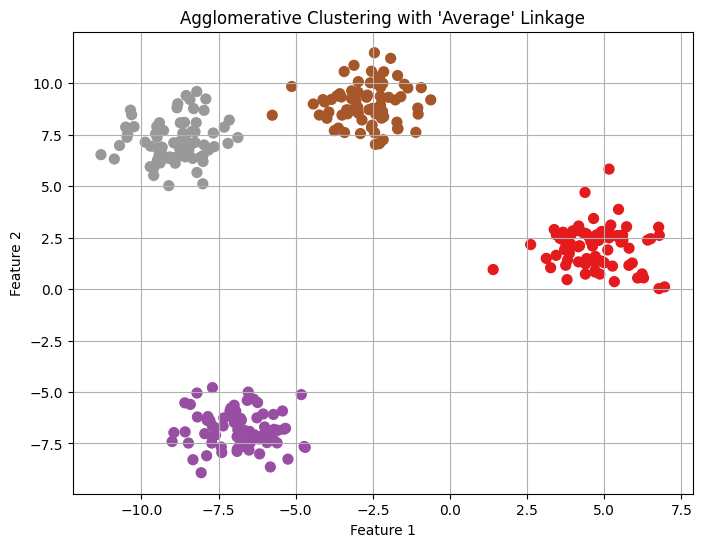

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Step 1: Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Apply Agglomerative Clustering with 'average' linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=50)
plt.title("Agglomerative Clustering with 'Average' Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


Q46 Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

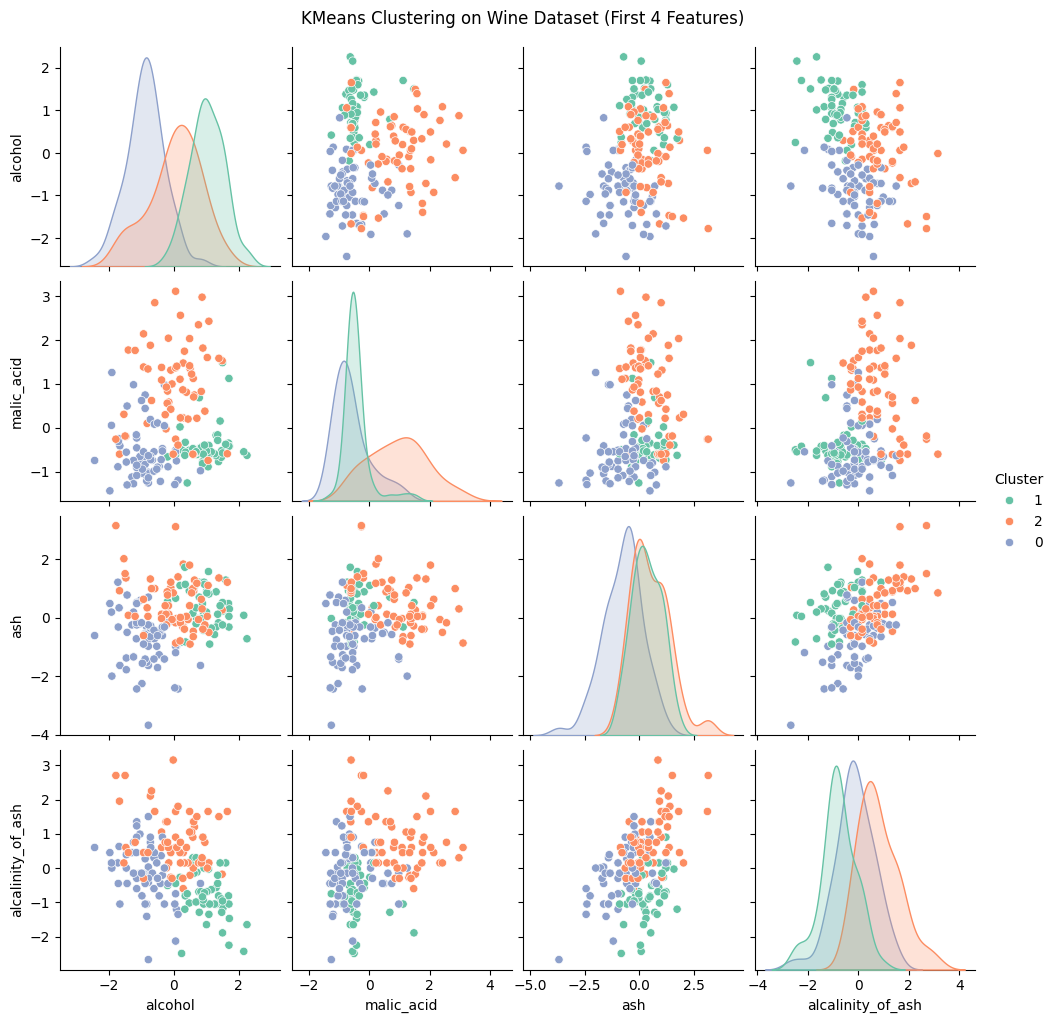

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data[:, :4]  # Use first 4 features
X_scaled = StandardScaler().fit_transform(X)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 3: Create a DataFrame for visualization
df = pd.DataFrame(X_scaled, columns=wine.feature_names[:4])
df['Cluster'] = clusters.astype(str)

# Step 4: Visualize using seaborn pairplot
sns.pairplot(df, hue='Cluster', diag_kind='kde', palette='Set2')
plt.suptitle('KMeans Clustering on Wine Dataset (First 4 Features)', y=1.02)
plt.show()


Q47 Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

In [27]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter

# Step 1: Generate noisy blob data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
X = StandardScaler().fit_transform(X)  # Standardize features

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Count clusters and noise points
label_counts = Counter(labels)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
num_noise = list(labels).count(-1)

print(f"Cluster counts (including noise label -1): {label_counts}")
print(f"Number of clusters found: {num_clusters}")
print(f"Number of noise points: {num_noise}")

Cluster counts (including noise label -1): Counter({np.int64(0): 100, np.int64(1): 100, np.int64(2): 100})
Number of clusters found: 3
Number of noise points: 0


Q48 Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

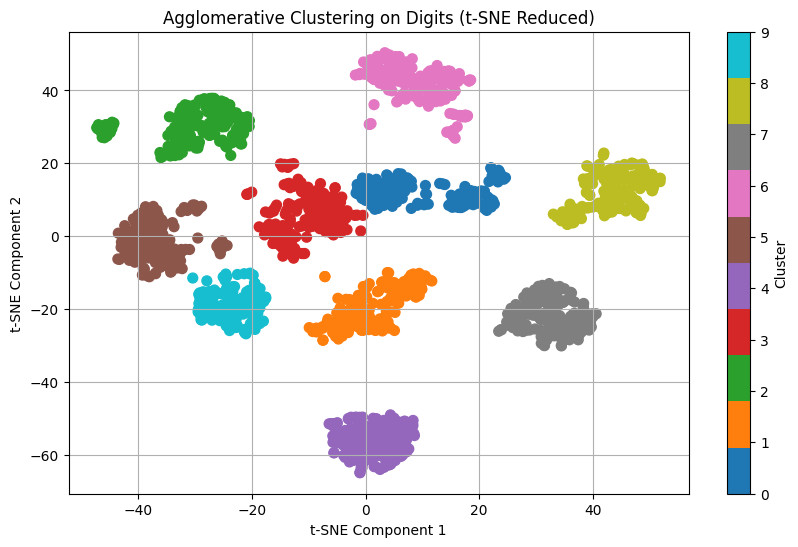

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Step 2: Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = agglo.fit_predict(X_tsne)

# Step 4: Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Agglomerative Clustering on Digits (t-SNE Reduced)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()